In [3]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download ('words')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
# Load the data set as df3.
tweets_cycling = pd.read_csv('tweets_cycling.csv')

# View DataFrame.
tweets_cycling

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries
0,Wed May 10 19:00:57 +0000 2023,1656373779591843849,1656373779591843849,RT @adamtranter: This is obviously good news b...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed May 10 18:57:11 +0000 2023,1656372829334433815,1656372829334433815,"RT @HanneyDP: As positive as this’ll be, it al...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed May 10 18:56:43 +0000 2023,1656372713869418496,1656372713869418496,https://t.co/L5UPa8eLhV\n\nA number of us are ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,Wed May 10 18:55:18 +0000 2023,1656372355222892558,1656372355222892558,Who are London’s cyclists? We take a look at w...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://twitter.com"" rel=""nofollow"">T...",NaN,NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
4,Wed May 10 18:55:09 +0000 2023,1656372320158511139,1656372320158511139,@London_Cycling @limebike EQUALITY?\n\nThere's...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.656324e+18,1.656324e+18,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Mon May 01 09:39:09 +0000 2023,1652970906891833346,1652970906891833346,@QuailFp @CyclingHull @Andrius21272467 @CycleC...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.652958e+18,1.652958e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2996,Mon May 01 09:38:24 +0000 2023,1652970718936571906,1652970718936571906,@CurlyAdventurer @London_Cycling Thank you - h...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.652963e+18,1.652963e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2997,Mon May 01 09:38:01 +0000 2023,1652970619602870272,1652970619602870272,RT @CurlyAdventurer: @RBKgreens Another intere...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2998,Mon May 01 09:37:06 +0000 2023,1652970392099725313,1652970392099725313,@QuailFp @CyclingHull @Andrius21272467 @CycleC...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.652967e+18,1.652967e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


### Change all the words in the comments to lower case

In [5]:
# Transform data to lowercase.
tweets_cycling['text'] = tweets_cycling['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
tweets_cycling['text'].head()

0    rt @adamtranter: this is obviously good news b...
1    rt @hanneydp: as positive as this’ll be, it al...
2    https://t.co/l5upa8elhv a number of us are run...
3    who are london’s cyclists? we take a look at w...
4    @london_cycling @limebike equality? there's a ...
Name: text, dtype: object

In [7]:
# Remove punctuation.
tweets_cycling['text'] = tweets_cycling['text'].str.replace('[^\w\s]','')

# Preview the result.
tweets_cycling['text'].head()

0    rt adamtranter this is obviously good news but...
1    rt hanneydp as positive as thisll be it also h...
2    httpstcol5upa8elhv a number of us are running ...
3    who are londons cyclists we take a look at wha...
4    london_cycling limebike equality theres a curi...
Name: text, dtype: object

In [9]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_text = ''
for i in range(tweets_cycling.shape[0]):
    # Add each comment.
    all_text = all_text + tweets_cycling['text'][i]

In [10]:
# You might need to install WordCloud.
!pip install WordCloud

In [11]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_text) 

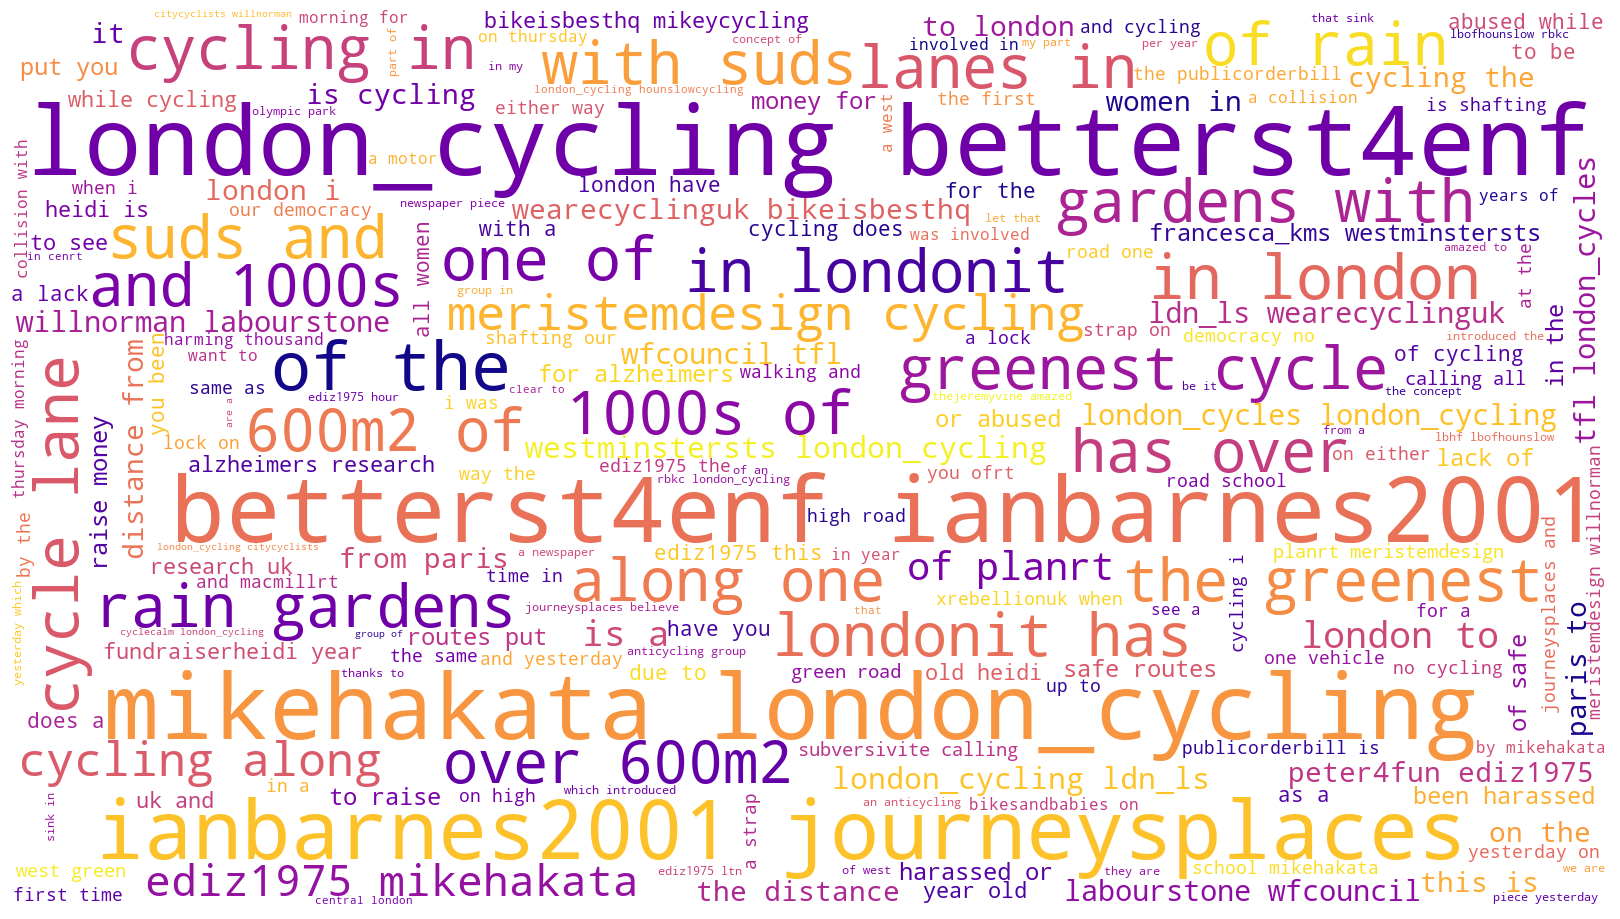

In [13]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Find the most frequently used words with tokenisation

In [14]:
# Tokenise the words.
tweets_cycling['text'] = tweets_cycling['text'].apply(word_tokenize)

# Preview data.
tweets_cycling['text'].head()

0    [rt, adamtranter, this, is, obviously, good, n...
1    [rt, hanneydp, as, positive, as, thisll, be, i...
2    [httpstcol5upa8elhv, a, number, of, us, are, r...
3    [who, are, londons, cyclists, we, take, a, loo...
4    [london_cycling, limebike, equality, theres, a...
Name: text, dtype: object

In [15]:
# Define an empty list of tokens.
tweets_tokens = []

for i in range(tweets_cycling.shape[0]):
    # Add each token to the list.
    tweets_tokens = tweets_tokens + tweets_cycling['text'][i]

In [17]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(tweets_tokens)

# Preview data.
fdist

FreqDist({'rt': 1707, 'the': 1625, 'of': 1499, 'london_cycling': 1285, 'to': 1284, 'cycling': 1226, 'in': 1198, 'a': 1002, 'ediz1975': 768, 'and': 749, ...})

In [21]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in tweets_tokens if word.isalnum()]

In [22]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


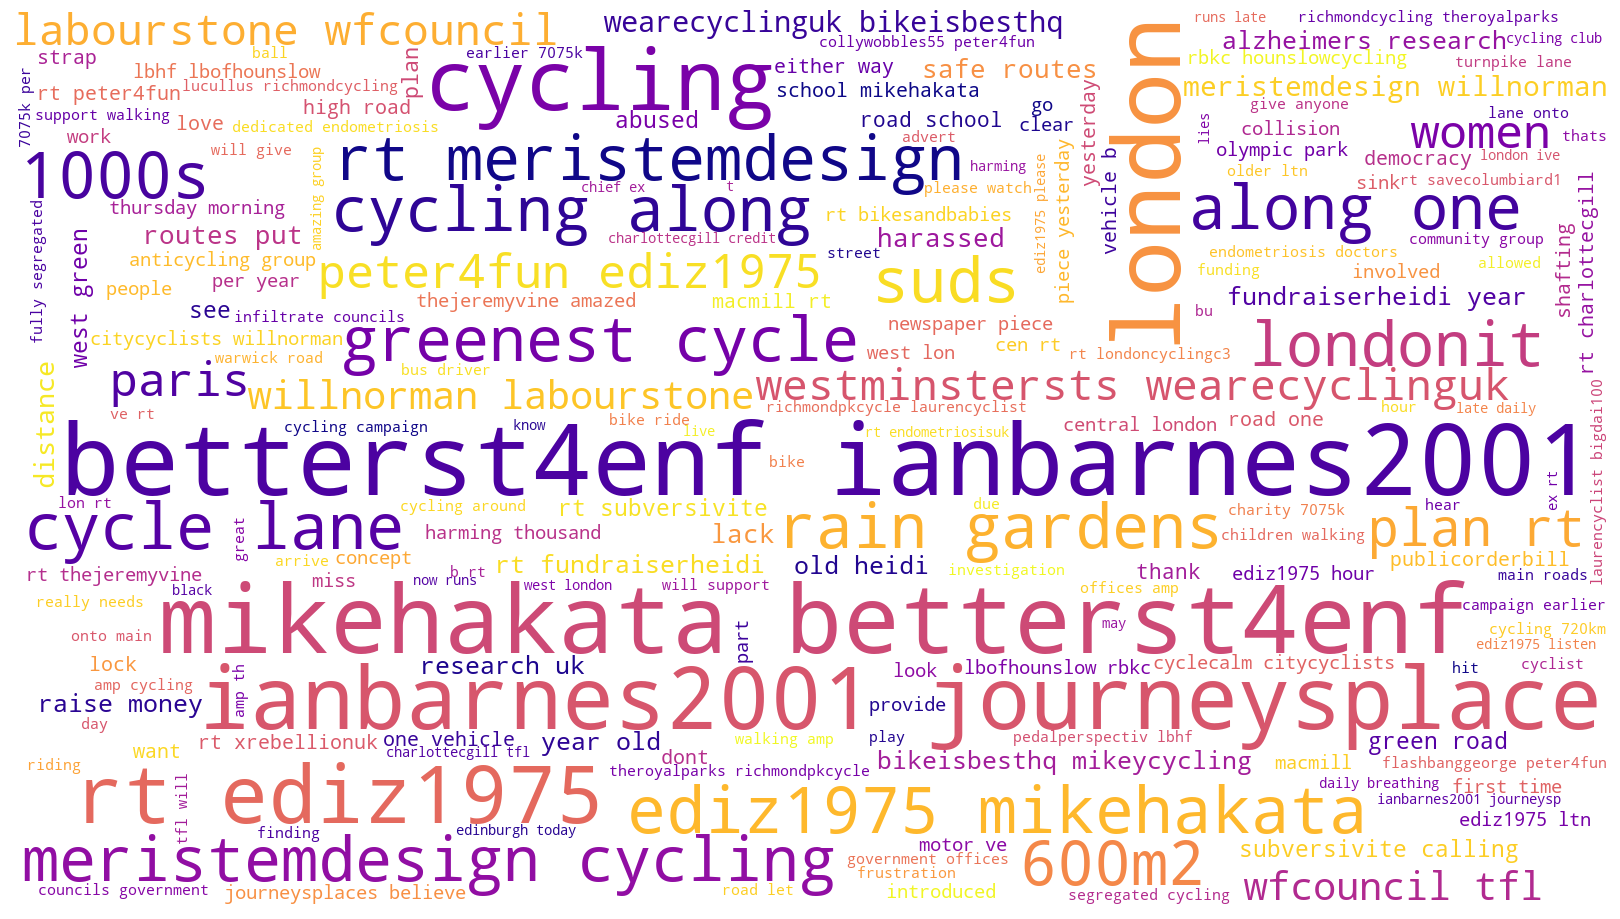

In [23]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [24]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'rt': 1707, 'cycling': 1226, 'ediz1975': 768, 'london': 724, 'betterst4enf': 703, 'ianbarnes2001': 679, 'mikehakata': 633, 'journeysplaces': 522, 'meristemdesign': 348, 'cycle': 313, ...})

In [27]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(20),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
rt,1707
cycling,1226
ediz1975,768
london,724
betterst4enf,703
ianbarnes2001,679
mikehakata,633
journeysplaces,522
meristemdesign,348


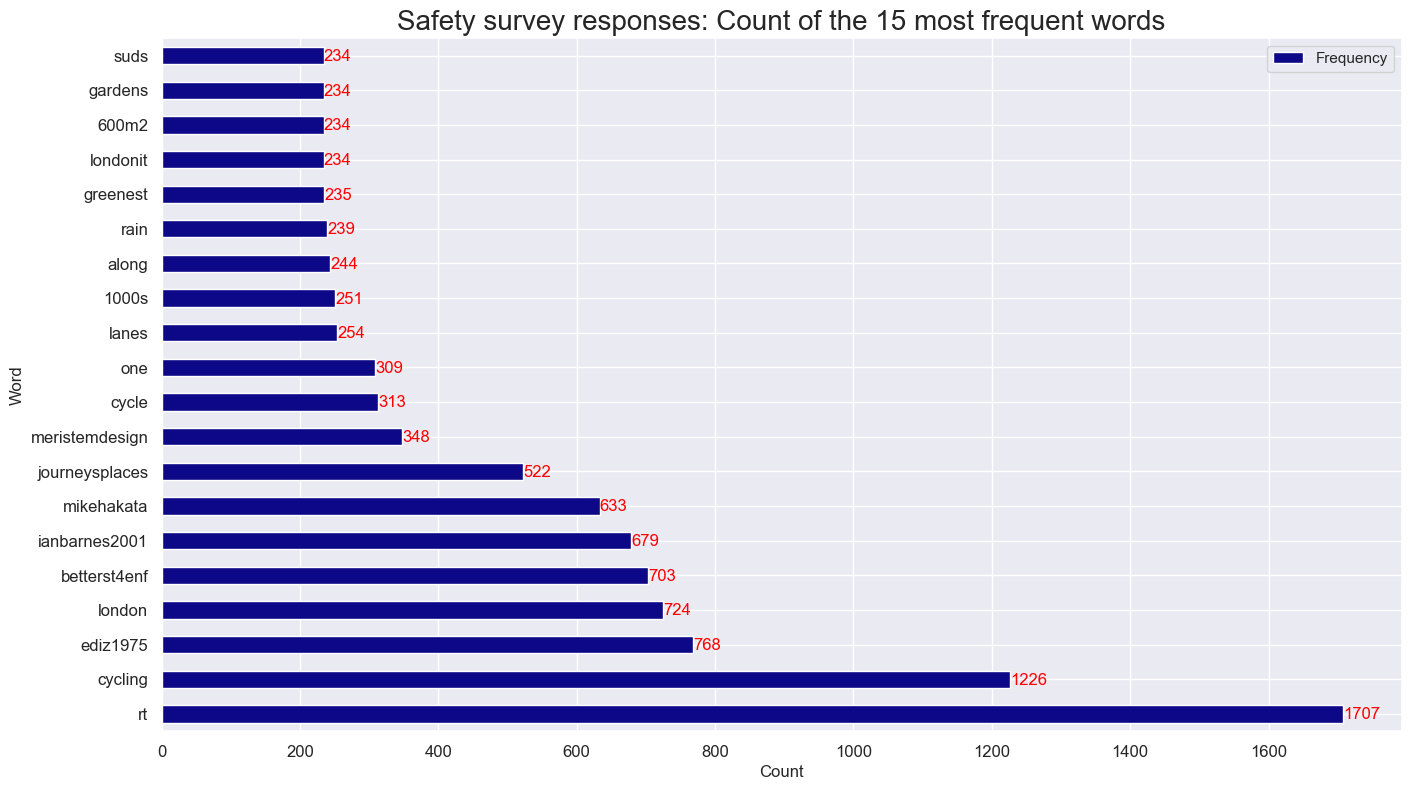

In [28]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')